# Neural Network Basics

## What is a Neural Network?
A neural network (NN) is a computational model inspired by biological neurons. It consists of interconnected layers of artificial neurons that process inputs, apply transformations, and produce outputs. Below is a breakdown of key components:

### Single Neuron Structure
- **Inputs (x₁, x₂, x₃)**: Features from the data.
- **Weights (w₁, w₂, w₃)**: Parameters adjusted during training.
- **Bias (b)**: Allows shifting the activation function.
- **Activation Function**: Determines the neuron's output (e.g., sigmoid).

## Layers and Forward Propagation
Neural networks stack neurons into **layers**:
1. **Input Layer**: Receives raw data.
2. **Hidden Layers**: Intermediate computations.
3. **Output Layer**: Final prediction.

## Activation Functions
Activation functions (e.g., sigmoid, ReLU) introduce non-linearity. The sigmoid used here maps outputs to [0, 1], ideal for binary classification:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

<div align="center">
  <img src="https://media.giphy.com/media/3o7TKUM3IgJBX2as9O/giphy.gif" width="400" alt="Sigmoid Animation">
</div>

In [2]:
# Interactive Plot to Visualize Activation Functions (Add this code cell)
import plotly.graph_objects as go
import numpy as np

z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

fig = go.Figure()
fig.add_trace(go.Scatter(x=z, y=sigmoid, name='Sigmoid'))
fig.update_layout(title='Activation Functions', xaxis_title='z', yaxis_title='σ(z)')
fig.show()

## Loss Function & Training
The **cross-entropy loss** measures prediction accuracy. During training, gradients of the loss w.r.t. weights are computed via backpropagation, and weights are updated using gradient descent:

$$ \text{Loss} = -y \log(\hat{y}) - (1-y) \log(1-\hat{y}) $$


C:\Users\etulyon1\AppData\Local\Temp\ipykernel_13080\4067554893.py:15: MatplotlibDeprecationWarning:

Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later



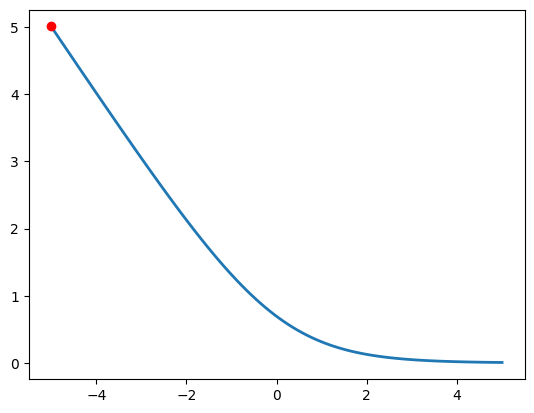

In [3]:
# Gradient Descent Animation (Add this code cell)
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Simulate loss landscape
weights = np.linspace(-5, 5, 100)
losses = [np.log(1 + np.exp(-w)) for w in weights]  # Simplified loss

fig, ax = plt.subplots()
ax.plot(weights, losses, lw=2)
line, = ax.plot([], [], 'ro')

def animate(i):
    line.set_data(weights[i], losses[i])
    return line,

ani = FuncAnimation(fig, animate, frames=100, interval=50)
HTML(ani.to_jshtml())

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import time
from IPython.display import clear_output

#### Initializing the parameters that we are going to use in our demo

In [8]:

z_range = np.linspace(-10, 10, 400)
sigmoid = 1 / (1 + np.exp(-z_range))
loss_curve = -np.log(sigmoid)

slider = widgets.IntSlider(value=1, min=1, max=10, description='Inputs:')
output = widgets.Output()


ANIM_STEPS = 40
ANIM_DELAY = 0.01
current_z = 0

def update_network(change):
    global current_z
    
    num_inputs = change['new']

    w = np.random.randn(num_inputs)
    x = np.random.rand(num_inputs)
    target_z = np.dot(w, x) + 0.1
    
    # Create animation trajectory
    start_z = current_z
    z_trajectory = np.linspace(start_z, target_z, ANIM_STEPS)
    
    with output:
        clear_output(wait=True)
        

        fig = plt.figure(figsize=(15, 5))
        gs = fig.add_gridspec(2, 2, width_ratios=[1, 0.6])
        
        ax1 = fig.add_subplot(gs[:, 0]) 
        ax2 = fig.add_subplot(gs[0, 1])
        ax3 = fig.add_subplot(gs[1, 1])
        
        # Draw static elements
        ax1.plot(z_range, sigmoid, c='#1f77b4', label='Sigmoid')
        ax2.plot(z_range, loss_curve, c='#ff7f0e', label='Loss')
        
        # Configure axes
        ax1.set_title("Neuron Activation")
        ax1.set_xlabel("Weighted Sum (z)")
        ax1.set_ylabel("σ(z)")
        ax1.grid(True)
        
        ax2.set_title("Loss Function")
        ax2.set_xlabel("z")
        ax2.set_ylabel("Cross-Entropy Loss")
        ax2.grid(True)
        
        ax3.axis('off')
        
        sigmoid_dot = None
        loss_dot = None
        param_text = None

        for z in z_trajectory:
            for artist in [sigmoid_dot, loss_dot, param_text]:
                if artist:
                    artist.remove()
            
            y = 1 / (1 + np.exp(-z))
            current_loss = -np.log(y)
            
            sigmoid_dot = ax1.scatter(z, y, c='red', s=80, 
                                     label=f'z = {z:.2f}\nσ(z) = {y:.4f}')
            ax1.legend(loc='upper left')
            
            loss_dot = ax2.scatter(z, current_loss, c='purple', s=80,
                                  label=f'Loss = {current_loss:.4f}')
            ax2.legend(loc='upper right')

            param_info = (f"Network State:\n"
                         f"• Weights: {w.round(2)}\n"
                         f"• Inputs: {x.round(2)}\n"
                         f"• Bias: 0.10\n"
                         f"• Current z: {z:.2f}")
            param_text = ax3.text(0.1, 0.5, param_info, fontsize=12,
                                 fontfamily='monospace', va='center')
            
            plt.show()
            time.sleep(ANIM_DELAY)
            clear_output(wait=True)

        current_z = target_z


slider.observe(update_network, names='value')
display(slider)
display(output)
update_network({'new': 1})

IntSlider(value=1, description='Inputs:', max=10, min=1)

Output()

Low Loss: A loss of 0.1507 indicates the prediction (0.8601) is close to the target (1), so the model is performing well for this input.

Training Implications: Small gradients during backpropagation (weights/bias won’t change drastically).

The model is already making a reasonable prediction.

### Key Takeaways
- **Single Neuron**: Computes weighted sum, applies activation.
- **Loss**: Quantifies prediction error.
- **Training**: Adjusts weights iteratively to minimize loss.
- **Scalability**: Adding layers/neurons enables complex pattern recognition.

## Using Backpropagation

### Backpropagation Explanation

### Core Concept
Backpropagation is the algorithm that:
1. 🎯 Calculates gradients of the loss with respect to network parameters
2. ⛓ Applies chain rule to propagate errors backward
3. 🔄 Updates parameters to minimize loss through gradient descent

### Mathematical Foundation
For our single neuron with sigmoid activation and cross-entropy loss:

**Forward Pass**  
```math
z = \sum(w_i x_i) + b \quad \text{(Weighted sum + bias)}  \\ \\

σ(z) = \frac{1}{1+e^{-z}} \quad \text{(Sigmoid activation)}  \\ \\

L = -\log(σ(z)) \quad \text{(Loss for target=1)}

In [ ]:
z_range = np.linspace(-10, 10, 400)
sigmoid = 1 / (1 + np.exp(-z_range))
loss_curve = -np.log(sigmoid)

slider = widgets.IntSlider(value=1, min=1, max=10, description='Inputs:')
output = widgets.Output()

ANIM_STEPS = 40
ANIM_DELAY = 0.01
learning_rate = 0.5
def update_network(change):
    global current_z
    
    num_inputs = change['new']
    
    w = np.random.randn(num_inputs)
    x = np.random.rand(num_inputs)
    bias = 0.1
    
    current_w = w.copy()
    current_bias = bias
    
    with output:
        clear_output(wait=True)
        
        fig = plt.figure(figsize=(15, 5))
        gs = fig.add_gridspec(2, 2, width_ratios=[1, 0.6])
        
        ax1 = fig.add_subplot(gs[:, 0])
        ax2 = fig.add_subplot(gs[0, 1])
        ax3 = fig.add_subplot(gs[1, 1])
        
        ax1.plot(z_range, sigmoid, c='#1f77b4', label='Sigmoid')
        ax2.plot(z_range, loss_curve, c='#ff7f0e', label='Loss')
        
        ax1.set_title("Neuron Activation")
        ax1.set_xlabel("Weighted Sum (z)")
        ax1.set_ylabel("σ(z)")
        ax1.grid(True)
        
        ax2.set_title("Loss Function")
        ax2.set_xlabel("z")
        ax2.set_ylabel("Cross-Entropy Loss")
        ax2.grid(True)
        
        ax3.axis('off')
        
        sigmoid_dot = None
        loss_dot = None
        param_text = None

        for step in range(ANIM_STEPS):
            z = np.dot(current_w, x) + current_bias
            y = 1 / (1 + np.exp(-z))
            current_loss = -np.log(y)
            
            delta = y - 1 
            dw = delta * x
            db = delta
            
            current_w -= learning_rate * dw
            current_bias -= learning_rate * db
            
            for artist in [sigmoid_dot, loss_dot, param_text]:
                if artist:
                    artist.remove()
            
            sigmoid_dot = ax1.scatter(z, y, c='red', s=80,
                                    label=f'z = {z:.2f}\nσ(z) = {y:.4f}')
            ax1.legend(loc='upper left')
            
            loss_dot = ax2.scatter(z, current_loss, c='purple', s=80,
                                 label=f'Loss = {current_loss:.4f}')
            ax2.legend(loc='upper right')

            param_info = (f"Network State:\n"
                         f"• Weights: {np.round(current_w, 2)}\n"
                         f"• Inputs: {np.round(x, 2)}\n"
                         f"• Bias: {current_bias:.2f}\n"
                         f"• Current z: {z:.2f}\n"
                         f"• Learning Rate: {learning_rate}")
            param_text = ax3.text(0.1, 0.5, param_info, fontsize=12,
                                 fontfamily='monospace', va='center')
            
            plt.show()
            time.sleep(ANIM_DELAY)
            clear_output(wait=True)

slider.observe(update_network, names='value')
display(slider)
display(output)
update_network({'new': 1})

IntSlider(value=1, description='Inputs:', max=10, min=1)

Output()

# Forward pass
z = np.dot(weights, inputs) + bias

activation = 1 / (1 + np.exp(-z))

loss = -np.log(activation)

# Backward pass
delta = activation - 1  # ∂L/∂z

weight_gradients = delta * inputs 

bias_gradient = delta

# Parameter updates
weights -= learning_rate * weight_gradients 

bias -= learning_rate * bias_gradient